SCC-ICMC-USP - 2o. semestre de 2023 </br>
**SCC275 - INTRODUÇÃO A CIENCIA DE DADOS** </br>
**Exercício 6** </br>
Profa. Roseli A. F. Romero </br>

##OBJETIVO: Curva ROC e Teste de hipótese
Nro do grupo:
22

Alunos:
Lucas Yuji Matubara



## Funções novas utilizadas no exercício

- `pandas.Series.nunique()` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)): Conta quantidade de valores únicos de uma coluna. Útil para verificar se uma coluna é relevante ou não
- `scipy.stats.ttest_ind()` ([link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)): Calcula o teste t para duas amostras independentes
- `sklearn.metrics.plot_roc_curve()` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)): Plota a curva ROC de um classificador dado um conjunto de input e alvo

### Questão 01.

Faça a exploração dos dados. Isto é, carregue, substitua valores faltantes, padronize os dados, etc. Para este exercicio será utilizado o conjunto de dados: titanic.csv.

Faça também a seleção dos atributos que achar mais relevantes.

 - Dica: Utilize a função `nunique()` durante a exploração dos dados. Você pode utilizar o "bom senso" (além de outras ferramentas é claro) na hora de escolher qual atributo do conjunto manter

In [421]:
# Download do dataset para o ambiente virtual.
!wget -O titanic.csv "https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3"

--2023-11-23 18:53:16--  https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3
Resolving drive.google.com (drive.google.com)... 108.177.98.100, 108.177.98.102, 108.177.98.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/25t1p177so1o188hhrt11v135rkgqt9v/1700765550000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=c0e066c5-af6b-4b3b-9954-1ab30f094733 [following]
--2023-11-23 18:53:16--  https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/25t1p177so1o188hhrt11v135rkgqt9v/1700765550000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=c0e066c5-af6b-4b3b-9954-1ab30f094733
Resolving doc-0s-a0-docs.googleusercontent.com (doc-0s-a0-docs.googleusercontent.com)... 74.125.197.132, 2607:

In [422]:
import pandas as pd

In [423]:
titanic = pd.read_csv('titanic.csv', na_values = '?')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Verificação de valores faltantes.

In [424]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Tratamento com mediana, mais frequente, e convertendo categoricos para discretos

In [425]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [426]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [427]:
Categoricos = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numericos = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
StringtoDiscrete = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic['Age'].values.reshape(-1, 1))

imputer = SimpleImputer(strategy='most_frequent')
titanic[Categoricos] = imputer.fit_transform(titanic[Categoricos])

label_encoder = LabelEncoder()
for col in StringtoDiscrete:
    titanic[col] = label_encoder.fit_transform(titanic[col].astype(str))

print(titanic.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Agora vamos testar e se possível remover outliers.

In [428]:
import matplotlib.pyplot as plt


Verificar os atributos a manter.

In [429]:
titanic[Numericos].nunique()

PassengerId    891
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

Em Numericos notamos que SibSp e Parch quase não tem valores unicos, portanto vou descartar eles. Também vou remover PassengerId já que tem a mesma função do index do pandas.

In [430]:
titanic[Categoricos].nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

Em Categoricos notamos que nome, ticket, e cabine tem uma grande quantidade de categorias, também vou optar por descartar eles.

In [431]:
titanic = titanic.drop(columns=['PassengerId', 'SibSp', 'Parch', 'Name', 'Ticket', 'Cabin'], axis = 1)
titanic.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


### Questão 02.
Utilize os mesmos classificadores usados no Exercicio 6: Decision Tree e KNN.</br>

- a) Separe o conjunto de dados de maneira estratificada (através do parâmetro `stratify` da função `train_test_split`) em 20% para teste e 80% para treino. Depois plote a curva ROC (`sklearn.metrics.plot_roc_curve`) para os dois classificadores (no mesmo gráfico).

- b) O melhor classificador da questão anterior também apresentou melhor desempenho na curva ROC? O que pode ter ocorrido?

- c) Teste 3 diferentes valores de `random_state` na função `train_test_split` e observe o comportamento das curvas.


*   Dica: Para plotar múltiplas curvas ROC no mesmo gráfico, defina uma figura com `fig, ax = plt.subplots()` e passe `ax` como parâmetro da função `plot_roc_curve`. Não se esqueça de passar também o nome do classificador para que o seu gráfico fique mais fácil de interpretar

In [432]:
from sklearn.model_selection import train_test_split

In [433]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=56)

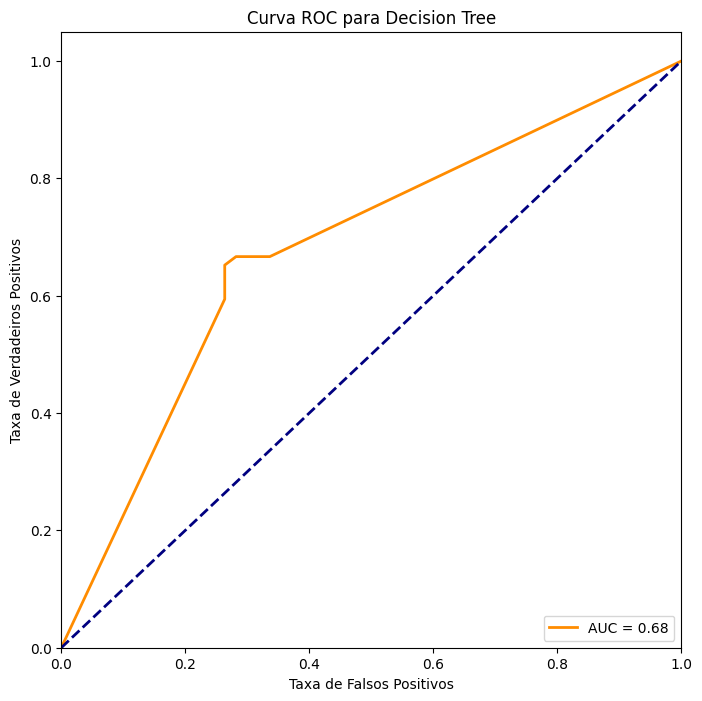

In [434]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

modelo_arvore = DecisionTreeClassifier(random_state=23)
y_treino = y_treino.astype(int)
y_teste = y_teste.astype(int)
modelo_arvore.fit(X_treino, y_treino)
previsoes = modelo_arvore.predict(X_teste)

probabilidades_positivas = modelo_arvore.predict_proba(X_teste)[:, 1]
taxa_falsos_positivos, taxa_verdadeiros_positivos, _ = roc_curve(y_teste, probabilidades_positivas)
area_roc = auc(taxa_falsos_positivos, taxa_verdadeiros_positivos)

plt.figure(figsize=(8, 8))
plt.plot(taxa_falsos_positivos, taxa_verdadeiros_positivos, color='darkorange', lw=2, label=f'AUC = {area_roc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [435]:
from sklearn.neighbors import KNeighborsClassifier

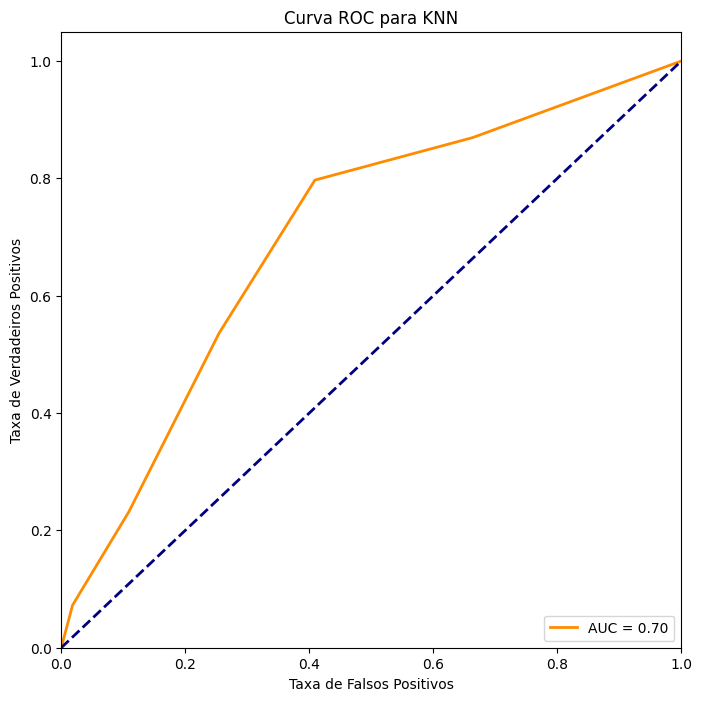

In [436]:
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_treino, y_treino)
previsoes_knn = modelo_knn.predict(X_teste)

probabilidades_positivas = modelo_knn.predict_proba(X_teste)[:, 1]
taxa_falsos_positivos, taxa_verdadeiros_positivos, _ = roc_curve(y_teste, probabilidades_positivas)
area_roc = auc(taxa_falsos_positivos, taxa_verdadeiros_positivos)

plt.figure(figsize=(8, 8))
plt.plot(taxa_falsos_positivos, taxa_verdadeiros_positivos, color='darkorange', lw=2, label=f'AUC = {area_roc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para KNN')
plt.legend(loc='lower right')
plt.show()

### Questão 03.

*   Implemente o 10-Fold Cross Validation (pode usar o scikit) com o melhor classificador, de acordo com a curva ROC,
*   calcule e imprima o valor da acurácia de cada fold na chave 'scores' do
dicionário de classificadores.

Vou utilizar o modelo do KNN por ter uma AUC maior.

In [437]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [438]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(modelo_knn, X_treino, y_treino, cv=cv, scoring='roc_auc')
media = np.mean(scores)

for i, acuracia in enumerate(scores):
    print(f"Fold {i + 1}: {acuracia:.2f}")

Fold 1: 0.65
Fold 2: 0.84
Fold 3: 0.82
Fold 4: 0.73
Fold 5: 0.73
Fold 6: 0.75
Fold 7: 0.66
Fold 8: 0.66
Fold 9: 0.73
Fold 10: 0.74
